In [1]:
import numpy as np 
import pandas as pd 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from sklearn.preprocessing import StandardScaler
import torch.nn.init as init

In [2]:
dataset = pd.read_csv("Dataset/Training_Set/data.csv", header=None)
dataset = StandardScaler().fit_transform(dataset)
labels = pd.read_csv("Dataset/Training_Set/label.csv", header=None)
labels = labels.astype(int)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dataset = torch.tensor(dataset, device=device)
labels = torch.tensor(labels.values, device=device)

In [3]:
class A(nn.Module):
    def __init__(self):
        super(A, self).__init__()
        self.layer1 = nn.Linear(64, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, 1)
        
        init.kaiming_normal_(self.layer1.weight)
        init.kaiming_normal_(self.layer2.weight)
        init.kaiming_normal_(self.layer3.weight)

        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x
    


In [4]:
class B(nn.Module):
    def __init__(self):
        super(B, self).__init__()
        self.layer1 = nn.Linear(64, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 256)
        self.layer4 = nn.Linear(256, 128)
        self.layer5 = nn.Linear(128, 64)
        self.layer6 = nn.Linear(64, 1)
        
        init.kaiming_normal_(self.layer1.weight)
        init.kaiming_normal_(self.layer2.weight)
        init.kaiming_normal_(self.layer3.weight)
        init.kaiming_normal_(self.layer4.weight)
        init.kaiming_normal_(self.layer5.weight)
        init.kaiming_normal_(self.layer6.weight)

        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = torch.sigmoid(self.layer6(x))
        return x
    


In [5]:
class C(nn.Module):
    def __init__(self):
        super(C, self).__init__()
        self.layer1 = nn.Linear(64, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 256)
        self.layer4 = nn.Linear(256, 512)
        self.layer5 = nn.Linear(512, 256)
        self.layer6 = nn.Linear(256, 128)
        self.layer7 = nn.Linear(128, 64)
        self.layer8 = nn.Linear(64, 1)
        
        init.kaiming_normal_(self.layer1.weight)
        init.kaiming_normal_(self.layer2.weight)
        init.kaiming_normal_(self.layer3.weight)
        init.kaiming_normal_(self.layer4.weight)
        init.kaiming_normal_(self.layer5.weight)
        init.kaiming_normal_(self.layer6.weight)
        init.kaiming_normal_(self.layer7.weight)
        init.kaiming_normal_(self.layer8.weight)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = F.relu(self.layer7(x))
        x = torch.sigmoid(self.layer8(x))
        return x
    


In [6]:
def fit(num_epochs, model, loss_fn, optimizer, train_dataloader, val_loader):
    train_losses = []  # Stores training losses for each epoch
    val_losses = []  # Stores validation losses for each epoch

    for epoch in range(num_epochs):
        model.train()  # Ensure the model is in training mode
        epoch_training_loss = 0  # For accumulating the loss for this epoch

        for inputs, targets in train_dataloader:
            inputs, targets = inputs.float().to(device), targets.float().to(device)
            preds = model(inputs)
            loss = loss_fn(preds, targets)
            epoch_training_loss += loss.item()  # Add the loss for this batch

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        # Record the average training loss for this epoch
        train_losses.append(epoch_training_loss / len(train_dataloader))

        model.eval()  # Switch the model to evaluation mode
        epoch_val_loss = 0  # For accumulating the loss for this epoch

        with torch.no_grad():
            for val_input, val_targets in val_loader:
                val_input, val_targets = val_input.float().to(device), val_targets.float().to(device)
                out = model(val_input)
                val_loss = loss_fn(out, val_targets)
                epoch_val_loss += val_loss.item()  # Add the loss for this batch

        # Record the average validation loss for this epoch
        val_losses.append(epoch_val_loss / len(val_loader))

        if (epoch + 1) % 50 == 0:
            print("Epoch [{}/{}], Training loss: {:.4f}, Validation Loss: {:.4f}"
                  .format(epoch + 1, num_epochs, train_losses[-1], val_losses[-1]))

    return train_losses, val_losses  # Return the losses for each epoch

In [7]:
#Input hyperparameter 
option = 'B'
num_epochs = 750
batch_size = 128
learning_rate= 0.0001

if option == 'A':
    model = A()
    
elif option == 'B':
    model = B()    
else: 
    model = C()

model.to(device)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate)
print(dataset.shape)
print(labels.shape)


# # Making sure shapes are correct and defining dataloader.
# input_np_array = np.array(dataset[:,1:-1].tolist(), dtype='float32')
# inputs = torch.from_numpy(input_np_array)
# # inputs = torch.from_numpy(np.array(dataset.iloc[:,1:-1].values, dtype='float32'))
# print(inputs.shape)



train_tensor_dataset = TensorDataset(dataset, labels)
val_size, train_size = int(0.1 * len(train_tensor_dataset)),  len(train_tensor_dataset) - int(0.1 * len(train_tensor_dataset))
train_data, val_data = random_split(train_tensor_dataset, [train_size, val_size])
train_dataloader = DataLoader(train_data, batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size)


# # Train the model.
train_losses,val_losses = fit(num_epochs, model, loss_fn, optimizer, train_dataloader, val_dataloader)

torch.Size([711, 64])
torch.Size([711, 1])
Epoch [50/750], Training loss: 0.6444, Validation Loss: 0.6814
Epoch [100/750], Training loss: 0.6099, Validation Loss: 0.6524
Epoch [150/750], Training loss: 0.5946, Validation Loss: 0.6479
Epoch [200/750], Training loss: 0.5854, Validation Loss: 0.6475
Epoch [250/750], Training loss: 0.5788, Validation Loss: 0.6475
Epoch [300/750], Training loss: 0.5736, Validation Loss: 0.6468
Epoch [350/750], Training loss: 0.5690, Validation Loss: 0.6459
Epoch [400/750], Training loss: 0.5649, Validation Loss: 0.6445
Epoch [450/750], Training loss: 0.5612, Validation Loss: 0.6428
Epoch [500/750], Training loss: 0.5577, Validation Loss: 0.6410
Epoch [550/750], Training loss: 0.5545, Validation Loss: 0.6390
Epoch [600/750], Training loss: 0.5513, Validation Loss: 0.6371
Epoch [650/750], Training loss: 0.5484, Validation Loss: 0.6349
Epoch [700/750], Training loss: 0.5456, Validation Loss: 0.6327
Epoch [750/750], Training loss: 0.5429, Validation Loss: 0.630

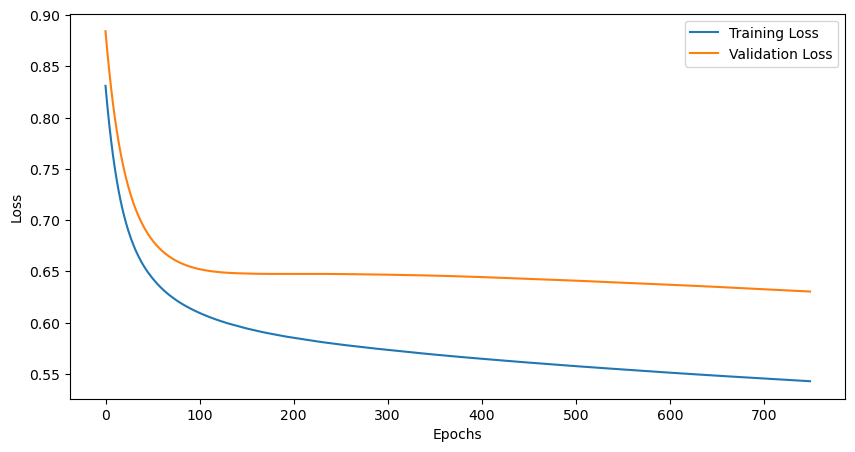

Validation Loss: 0.6304
Validation Accuracy: 0.6479


In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

def evaluate_model(model, val_dataloader, loss_fn, device):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    correct = 0
    with torch.no_grad():  # Do not calculate gradients since we are only evaluating
        for inputs, targets in val_dataloader:
            inputs, targets = inputs.float().to(device), targets.float().to(device)
            outputs = model(inputs)
            val_loss += loss_fn(outputs, targets).item()
            
            # For binary classification, we consider the predicted class to be the one with probability > 0.5
            pred = outputs >= 0.5
            correct += (pred == targets).sum().item()

    val_loss /= len(val_dataloader)
    accuracy = correct / len(val_dataloader.dataset)

    return val_loss, accuracy


val_loss, val_accuracy = evaluate_model(model, val_dataloader, loss_fn, device)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

In [9]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable


test_data = pd.read_csv('Dataset/Test_Set/test.csv' ,header=None)
test_labels = pd.read_csv('Dataset/Test_Set/label.csv',header=None)  

# 2. Preprocess the test data and labels
# test_data = preprocess(test_data)
# test_labels = preprocess_labels(test_labels)

# 3. Convert DataFrame to DataLoader
class TestDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

test_dataset = TestDataset(test_data, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=16)

# 4. Evaluate
model.eval()
test_loss = 0
correct = 0
loss_fn = torch.nn.BCELoss()  # Adjust this to match your loss function
with torch.no_grad():
    for inputs, targets in test_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        print(outputs)

        # Reshape the outputs tensor to match the shape of targets
        outputs = outputs.view(-1)
        
        
        test_loss += loss_fn(outputs, targets.view(-1)).item()
        
        # Convert the outputs to boolean values for comparison
        pred = outputs >= 0.5
        print("outputs")
        # Convert targets to boolean values as well
        # Option 1
        targets = targets.view(-1) >= 0.5
        correct += (pred == targets).sum().item()

test_loss /= len(test_dataloader)
accuracy_test = correct / len(test_dataloader.dataset)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

tensor([[0.6052],
        [0.6118],
        [0.7573],
        [0.2192],
        [0.4777],
        [0.4965],
        [0.2368],
        [0.2445],
        [0.5041],
        [0.6454]])
outputs
Test Loss: 0.6368
Test Accuracy: 0.6000


In [10]:
torch.save(model.state_dict(), f'model_{option}_{learning_rate}_{batch_size}_{num_epochs}.pt')